In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create an object (it's an element in the program):

In [2]:
'''
P0. Implement a list
'''

class LNode:
    def __init__(self,val):
        self.val = val
        self.next = None

In [3]:
# Create a function for decomposing the parameter mode

def parameter_modes(code):
    
    # Add leading zeros to make 5 digits
    c_str = '0'*(5-len(str(code)))+str(code)
    
    return [c_str[0],c_str[1],c_str[2], c_str[3:]]

#demo
#incom_demo = [109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99] + np.zeros((1,1000)).astype(int)[0].tolist()
#incom_demo = [1102,34915192,34915192,7,4,7,99,0]

for i, value in enumerate(incom_demo):
    vars()['node'+str(i)]=LNode(value)

Create a funciton to run a program:

In [188]:
incom0 = np.fromfile('11_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

for i, value in enumerate(incom0):
    vars()['node'+str(i)]=LNode(value)

In [189]:
len(incom0)

1633

In [190]:
def intcode_call(signal_input, incom, pointer_position=0, relative_base=0, reinitialize = False):
    # Re-read input to reset intcom program
    if reinitialize == True:
        incom = np.fromfile('11_input.txt',sep=",").astype(int)
        
    for j, value in enumerate(incom):
        vars()['node'+str(j)]=LNode(value)

    mem = signal_input

    # signal_input
    #signal_in = signal_input

    output = []

    output_last = 0
    
    rel_base = relative_base
    i = pointer_position

    while i <= len(incom):
        
        #print(i)

        # decode the parameter modes
        p_modes = parameter_modes(vars()['node'+str(i)].val)

        # build instruction

        # retrieve parameters for specific opcode
        if p_modes[-1] in ['99']:
            instr = [99]
            if output_last == 0:
                print('Opcode 99 executed.')
                print('Hmmm... last instruction was not an output!')
            
            # Prepare incom for return
            incom_out = []
            for j in range(len(incom)):
                incom_out = incom_out + [vars()['node'+str(j)].val]
            print('paintbot program complete')
            
            output = []
            
            return output, incom_out, i, rel_base
            break
        
        elif p_modes[-1] in ['01', '02', '07', '08']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+4):
                instr += [vars()['node'+str(j)].val]
            i += 4

        elif p_modes[-1] in ['03', '04','09']:
            instr = [int(p_modes[-1])] + [vars()['node'+str(i+1)].val]
            i += 2

        elif p_modes[-1] in ['05', '06']:
            instr = [int(p_modes[-1])]
            for j in range(i+1, i+3):
                instr += [vars()['node'+str(j)].val]
            i += 3

        else:
            print('Uh oh... intruction not understood')
            break
            
        #print(p_modes)
        #print(instr)


        # Execute instructions
        
        # ADDITION # ==========================================================================
        if instr[0] == 1:
            #print('addition')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = a+b # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        
        # MULTIPLICATION # =========================================================
        elif instr[0] == 2:
            #print('multiplication')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            #print('immediate mode a = ' + str(a))
            if p_modes[2] == '0': # if parameter is position mode
                #print('position mode a = ' + str(a))
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # if parameter is in relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                #print('relative mode a = ' + str(a))

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # if parameter is in relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            ab = int(a)*int(b) # calculate the overwrite value

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # if parameter is in relative mode
                if rel_base + instr[3] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab

        # INPUT # =====================================================================        
        elif instr[0] == 3:
            #print('input')
            output_last = 0
            # write input (mem)
            if p_modes[2] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                vars()['node'+str(rel_base + instr[1])].val = mem#[0]
                del mem
            else:
                #print(len(mem))
                vars()['node'+str(instr[1])].val = mem#[0]
                del mem
        
        
        # OUTPUT # =================================================================
        elif instr[0] == 4:
            #print('output')
            output_last = 1
            # define a
            #print('output parameter mode: ' + str(p_modes[2]) +
            #      ', parameter: ' + str(instr[1]))
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                

            # write to output
            output = output + [a]
            #print('output:', output)
            if len(output) == 2:
                # Repackage the nodes as incom
                incom_out = []
                for j in range(len(incom)):
                    incom_out = incom_out + [vars()['node'+str(j)].val]

                return output, incom_out, i, rel_base

        
        # JUMP IF TRUE # ===========================================================
        elif instr[0] == 5:
            #print('jump if true')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                #print('retrieving node ' + str(instr[1]))
                a = vars()['node'+str(instr[1])].val
                #print('a is' + str(a))
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-true. Check for parameter mode 2!")
                break
            else:
                #print('a is' + str(a))
                if a != 0:
                    i = b
                    
                    
        # JUMP IF FALSE # ===========================================================
        elif instr[0] == 6:
            #print('jump if false')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                if a == 0:
                    i = b
                    
        # LESS THAN # ==========================================================================
        elif instr[0] == 7:
            #print('less than')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a < b:
                #print(str(a) + 'is less than' + str(b))
                ab = 1
            else:
                #print(str(a) + 'is NOT less than' + str(b))
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab 
            else:
                #print('setting node ' + str(instr[3]) + 'to be ' + str(ab))
                vars()['node'+str(instr[3])].val = ab 

        # EQUALS # ========================================================================
        elif instr[0] == 8:
            #print('equals')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val

            # define b
            b = instr[2] # default is immediate mode
            if p_modes[1] == '0': # if parameter is position mode
                b = vars()['node'+str(instr[2])].val
            elif p_modes[1] == '2': # relative mode
                if rel_base + instr[2] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                b = vars()['node'+str(rel_base + instr[2])].val

            # apply test
            if a == b:
                ab = 1
            else:
                ab = 0                

            # write         
            if p_modes[0] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[0] == '2': # relative mode
                vars()['node'+str(rel_base + instr[3])].val = ab
            else:
                vars()['node'+str(instr[3])].val = ab
                
        # ADJUST RELATIVE BASE # =============================================================
        elif instr[0] == 9:
            #print('adjust relative base')
            output_last = 0
            # define a
            a = instr[1] # default is immediate mode
            if p_modes[2] == '0': # if parameter is position mode
                a = vars()['node'+str(instr[1])].val
            elif p_modes[2] == '2': # relative mode
                if rel_base + instr[1] < 0:
                    print('Uh oh... relative base reference is less than 0!')
                    break
                a = vars()['node'+str(rel_base + instr[1])].val
                
            # execute: adjust relative base
            if p_modes[1] == '1': # I think the problem states this will never be the case...
                print('uh oh... trying to write in immediate mode???')
                break
            elif p_modes[1] == '2': # relative mode
                print("'Write' fail for jump-if-false. Check for parameter mode 2!")
                break
            else:
                rel_base += a
                #print('Relative base now:'+str(rel_base))
                

        else:
            print('Instruction not understood!')
            break

    if i > len(incom):
        print('End of input code reached.')
        
    # Repackage the nodes as incom
    incom_out = []
    for j in range(len(incom)):
        incom_out = incom_out + [vars()['node'+str(j)].val]
        
    print('returning at end of intcode')

    return output, incom_out, i, rel_base

In [90]:
# create a test for the jump if false
# initial index should be 6

# if it works, 101 should appear in idx 0
# if not, 201 should appear in idx 0

incom_test = []
for i in range(20):
    incom_test += [i]

incom_test[5:9] = [99,2206,15,16]

incom_test[1:5] = [1101,1,100,0]

incom_test[9:14] = [1101,1,200,0,99]

incom_test[15:17] = [1,1]

intcode_output, incom, pointer, relative_base = intcode_call(signal_input=1, incom=incom_test,
                                                             pointer_position=6, relative_base=0)

incom[0]

Opcode 99 executed.
Hmmm... last instruction was not an output!
paintbot program complete


201

In [114]:
# create a test for "input"
# initial index should be 6


incom_test = []
for i in range(20):
    incom_test += [i]

incom_test[5:9] = [99,103,14,99]

#incom_test[1:5] = [1101,1,100,0]

#incom_test[9:14] = [1101,1,200,0,99]

#incom_test[15:17] = [1,1]

intcode_output, incom, pointer, relative_base = intcode_call(signal_input=7, incom=incom_test,
                                                             pointer_position=6, relative_base=10)

incom

uh oh... trying to write in immediate mode???
returning at end of intcode


[0, 1, 2, 3, 4, 99, 103, 14, 99, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [126]:
# create a test for "adjust relative base"
# initial index should be 6

# if it works, 101 should appear in idx 0
# if not, 201 should appear in idx 0

incom_test = []
for i in range(20):
    incom_test += [i]

incom_test[5:9] = [99,209,4,99]

incom_test[14] = -2

#incom_test[9:14] = [1101,1,200,0,99]

#incom_test[15:17] = [1,1]

intcode_output, incom, pointer, relative_base = intcode_call(signal_input=7, incom=incom_test,
                                                             pointer_position=6, relative_base=10)

relative_base

Opcode 99 executed.
Hmmm... last instruction was not an output!
paintbot program complete


8

In [152]:
# test outputs a copy of itself - PASS
test = np.append([109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99], np.zeros(100)).astype(int)
test2 = [1102,34915192,34915192,7,4,7,99,0] # should output a 16-digit number - PASS
test3 = [104,1125899906842624,99] # should output the large number - PASS
test4 = [3,0,4,0,99] # outputs whatever is input - PASS
test5 = [1002,4,3,4,33] # 99 should be written to position 4 - PASS
test6 = np.fromfile('05_input.txt',sep=",").astype(int) # input of 1 should give 5346030, input 5 should give 513116 - PASS
# test 7 - output 999 if the input value is below 8 - PASS
#          output 1000 if the input value is equal to 8 - PASS
#          or output 1001 if the input value is greater than 8 - PASS
test7 = [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]

In [169]:
intcode_output, incom, pointer, relative_base = intcode_call(signal_input=10, incom=test7,
                                                             pointer_position=0, relative_base=0)
intcode_output

Opcode 99 executed.
Hmmm... last instruction was not an output!
paintbot program complete


[1001]

In [150]:
intcode_output, incom, pointer, relative_base = intcode_call(signal_input=[], incom=[4,3,99,28],
                                                             pointer_position=0, relative_base=0)
intcode_output, incom

paintbot program complete


([], [4, 3, 99, 28])

Test the incode:

In [52]:
output, incom, pointer, relative_base = intcode_call(signal_input=0, incom=incom0, pointer_position=0, relative_base=0)
output

[1, 0]

I need to create the map and bot.

In [57]:
# Create a bot class:
class Bot:
    def __init__(self,coord,direction):
        self.coord = coord
        self.direction = 0
        
    def move(self,instruction):
        # given an instruction from the intcode, make a rotation
        if instruction == 0: # should turn left
            self.direction -= 90
            if self.direction < 0:
                self.direction = 270
        if instruction == 1: # should turn right
            self.direction += 90
            if self.direction >= 360:
                self.direction = 0
                
        #print('New Direction: ' + str(self.direction))
        
        # move bot in the appropriate direction
        if self.direction == 0: # move north
            self.coord[0] -=1
        if self.direction == 90: # move east
            self.coord[1] +=1
        if self.direction == 180: # move south
            self.coord[0] +=1
        if self.direction == 270: # move west
            self.coord[1] -=1
            
    def sense(self,paint_map):
        #print(paint_map[self.coord[0],self.coord[1]])
        if paint_map[self.coord[0],self.coord[1]] == 1:
            return 1
        else:
            return 0
    
    def paint(self,paint_map,instruction):
        paint_map[self.coord[0],self.coord[1]] = instruction
        return paint_map
        

Create a test for the bot...

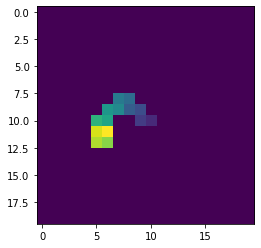

In [54]:
map_test = np.zeros((20,20))-1
test_instr = [[0,1],[1,2],[0,3],[1,4],[0,5],[0,6],[1,7],[0,8],[1,9],[0,10],[0,11],[1,12],[1,13],[1,14],[1,15],[1,16]]

test_bot = Bot([10,10],0)

#map_test[test_bot.coord[0],test_bot.coord[1]] += 1

for i in range(len(test_instr)):
    test_bot.sense
    map_test = test_bot.paint(map_test,test_instr[i][1])
    test_bot.move(test_instr[i][0])

plt.imshow(map_test)

Seems to be working. Production time!

In [131]:
incom0 = np.fromfile('11_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

# Let's put the bot at 100,100 of a 200 x 200 map
# Let's say that the unpainted values are -1, black are 0, and white are 1
# I'll need to remember that the computer should consider unpainted cells black.
paint_map = np.zeros((200,200))-1

# Initialize paintbot
paintbot = Bot([100,100],0)

# initial call - writes interim code, positions, etc, first instruction
intcode_output, incom, pointer, relative_base = intcode_call(signal_input=0, incom=incom0, pointer_position=0, relative_base=0)
print(intcode_output, len(incom), pointer, relative_base)

# bot paint
paint_map = paintbot.paint(paint_map,intcode_output[0])
# move bot
paintbot.move(intcode_output[1])

while intcode_output != []:
    #sense paint
    paint_code = paintbot.sense(paint_map)
    # call intcode
    intcode_output, incom, pointer, relative_base = intcode_call(signal_input=paint_code, incom=incom, pointer_position=pointer, relative_base=relative_base)
    if intcode_output == []:
        print('breaking out of bot-paint while loop')
        break
    # paint
    paint_map = paintbot.paint(paint_map,intcode_output[0])
    # move bot
    paintbot.move(intcode_output[1])

[1, 0] 1633 15 0
Opcode 99 executed.
Hmmm... last instruction was not an output!
paintbot program complete
breaking out of bot-paint while loop


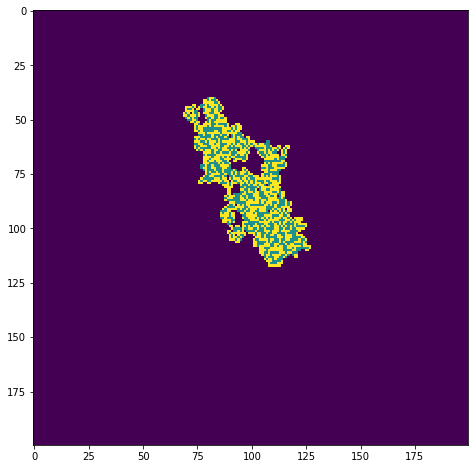

In [132]:
plt.figure(figsize=(8,8))
plt.imshow(paint_map)

In [12]:
# Find the cells that have been painted:
np.where(paint_map != -1)[0].shape

(1930,)

### Part 2

[0, 1] 1633 317 633
Opcode 99 executed.
Hmmm... last instruction was not an output!
paintbot program complete


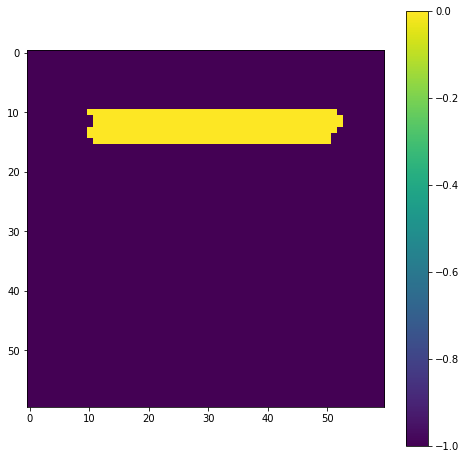

In [191]:
incom0 = np.fromfile('11_input.txt',sep=",").astype(int)

incom0 = np.append(incom0, np.zeros(1000)).astype(int)

# Let's put the bot at 10,10 of a 60 x 60 map
# Let's say that the unpainted values are -1, black are 0, and white are 1
paint_map = np.zeros((60,60))-1
paint_map_trace = np.zeros((60,60))
pmti = 0 # counter for paint map trace

# Initialize paintbot
paintbot = Bot([10,10],0)

# initial call - this time on a white cell!
intcode_output, incom, pointer, rel_base = intcode_call(signal_input=1, incom=incom0,
                                                             pointer_position=0, relative_base=0)
print(intcode_output, len(incom), pointer, rel_base)

# bot paint
paint_map = paintbot.paint(paint_map,intcode_output[0])
paint_map_trace = paintbot.paint(paint_map_trace,pmti)
# move bot
paintbot.move(intcode_output[1])

while intcode_output != []:
#for i in range(1):
    pmti += 1
    #sense paint
    paint_code = paintbot.sense(paint_map)
    # call intcode
    intcode_output, incom, pointer, rel_base = intcode_call(signal_input=paint_code,
                                                                 incom=incom, pointer_position=pointer,
                                                                 relative_base=rel_base)
    if intcode_output == []:
        break
    # paint
    #print(intcode_output)
    paint_map = paintbot.paint(paint_map,intcode_output[0])
    paint_map_trace = paintbot.paint(paint_map_trace,pmti)
    #plt.imshow(paint_map)
    # move bot
    paintbot.move(intcode_output[1])
    
plt.figure(figsize=(8,8))
plt.imshow(paint_map)
plt.colorbar()

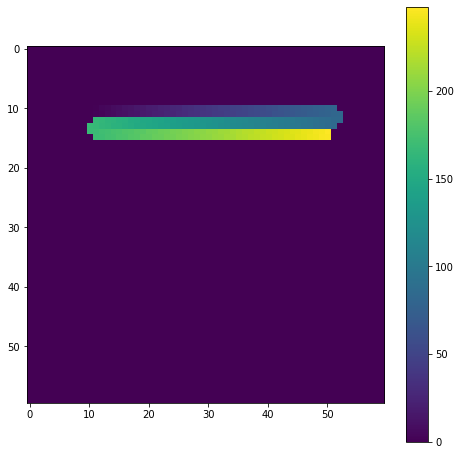

In [187]:
plt.figure(figsize=(8,8))
plt.imshow(paint_map_trace)
plt.colorbar()

In [41]:
print(intcode_output, len(incom), pointer, relative_base)

[0, 1] 1633 475 841


In [49]:
investigate = incom
investigate[490:500]

[109, -2, 2106, 0, 0, 463, 109, 4, 2102, 1]

In [45]:
investigate[10]

0

In [33]:
incom[630:700]

[]

In [96]:
mem=[4]
mem[0]

4

In [130]:
paint_map[10:15,10:15]

array([[ 0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [185]:
mem = [0]
mem

[0]

In [186]:
mem[0]

0